0.0
4.267928448
1.819873642
2.349059784
3.426167823
4.872036556
Index([('AT1G01010',), ('AT1G01020',), ('AT1G01030',), ('AT1G01040',),
       ('AT1G01050',), ('AT1G01060',), ('AT1G01070',), ('AT1G01080',),
       ('AT1G01090',), ('AT1G01100',),
       ...
       ('ATMG01200',), ('ATMG01220',), ('ATMG01330',), ('ATMG01350',),
       ('ATMG01360',), ('ATMG01370',), ('ATMG01380',), ('ATMG01390',),
       ('ATMG01400',), ('ATMG01410',)],
      dtype='object', length=22010)
[[-1.7164291   1.56455093  0.3599067  ... -0.65083088 -0.57911466
  -0.68669561]
 [ 0.91000684  0.37782951 -1.7922604  ...  0.66784892 -0.57911466
   1.78654357]
 [-0.596499   -1.14832192  0.19401446 ...  0.071144   -0.57911466
  -0.68669561]
 [-0.2708437  -1.03921487 -0.32720472 ... -1.03403781 -0.57911466
  -0.68669561]
 [ 0.39199667  0.82285085  1.58529966 ... -0.8703344   0.16436955
  -0.68669561]
 [ 1.28176829 -0.57769451 -0.01975571 ...  1.81621016  2.1520891
   0.96023886]]
(6, 22010)


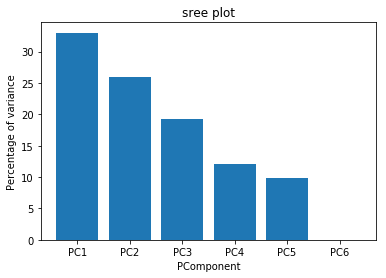

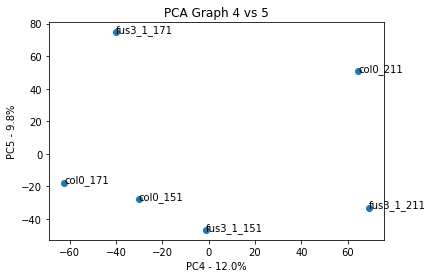

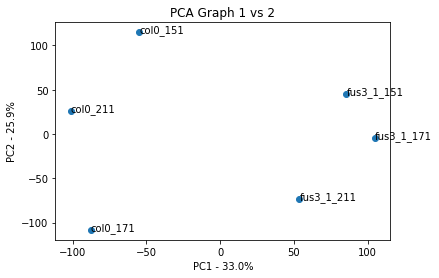

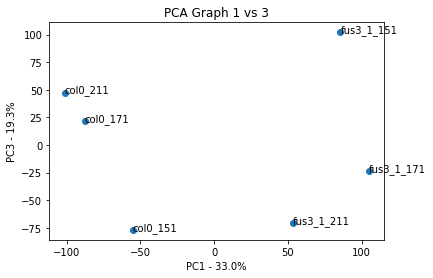

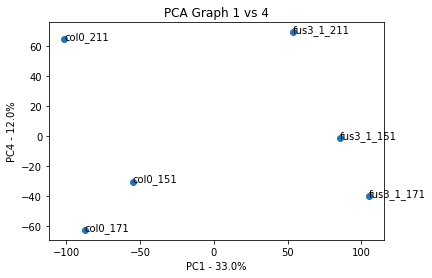

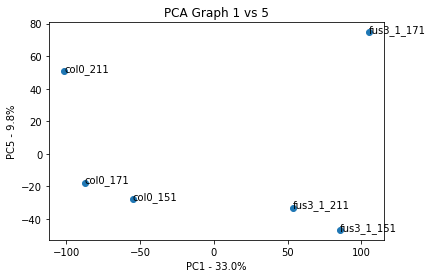

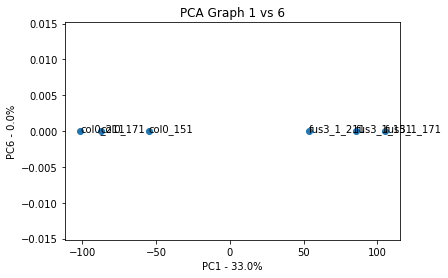

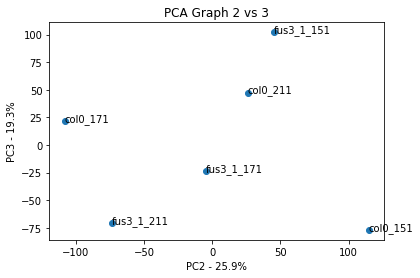

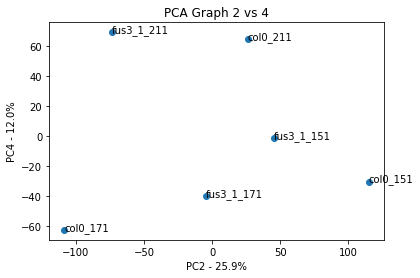

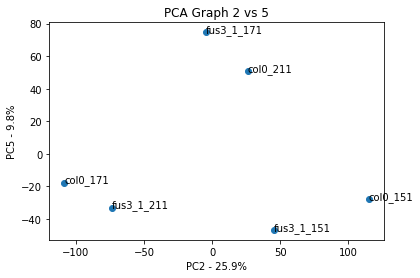

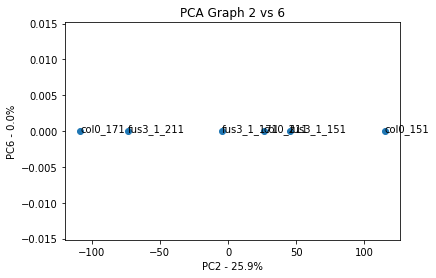

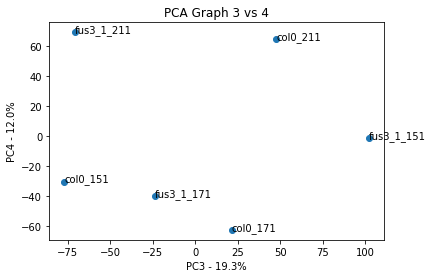

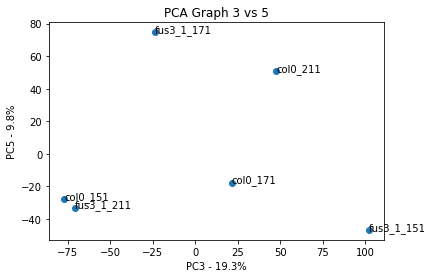

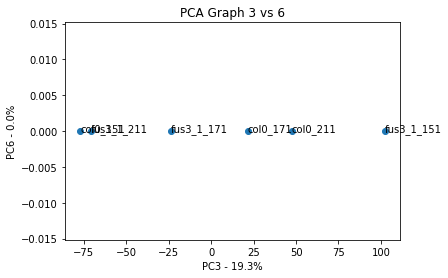

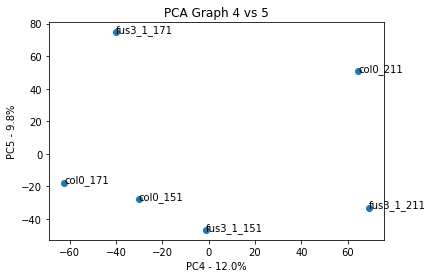

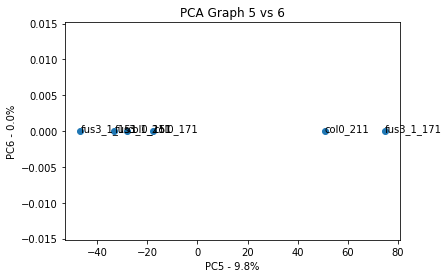

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df1=pd.read_csv('datacol0_fus3.csv')
genes=df1.loc["0":,"genes":"genes"]
col0_15=['col0_15' + str(i) for i in range(1,2)]
col0_17=['col0_17' + str(i) for i in range(1,2)]
col0_21=['col0_21' + str(i) for i in range(1,2)]
fus3_1_15=['fus3_1_15' + str(i) for i in range(1,2)]
fus3_1_17=['fus3_1_17' + str(i) for i in range(1,2)]
fus3_1_21=['fus3_1_21' + str(i) for i in range(1,2)]

data=pd.DataFrame(columns=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21],index=genes)
i=0
print(df1.iloc[i]['col0_15'])
print(df1.iloc[i]['col0_17'])
print(df1.iloc[i]['col0_21'])
print(df1.iloc[i]['fus3_1_15'])
print(df1.iloc[i]['fus3_1_17'])
print(df1.iloc[i]['fus3_1_21'])


print(data.index)
for gene in data.index:
    data.loc[gene,'col0_151':'col0_151']=df1.iloc[i]['col0_15']
    data.loc[gene,'col0_171':'col0_171']=df1.iloc[i]['col0_17']
    data.loc[gene,'col0_211':'col0_211']=df1.iloc[i]['col0_21']
    data.loc[gene,'fus3_1_151':'fus3_1_151']=df1.iloc[i]['fus3_1_15']
    data.loc[gene,'fus3_1_171':'fus3_1_171']=df1.iloc[i]['fus3_1_17']
    data.loc[gene,'fus3_1_211':'fus3_1_211']=df1.iloc[i]['fus3_1_21']
   
    i=i+1

scaled_data=StandardScaler().fit_transform(data.T)
print(scaled_data)
print(scaled_data.shape)

check_data=np.transpose(scaled_data)


scaled_data.to_csv('scaled data.csv', sep='\t', encoding='utf-8')
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
figure=plt.figure()
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of variance')
plt.xlabel('PComponent')
plt.title('sree plot')
plt.show()
figure.savefig('sreeplot10.png')



figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC4,pca_df.PC5)
plt.title('PCA Graph 4 vs 5')
plt.xlabel('PC4 - {0}%'.format(per_var[3]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC4.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC4_PC5.png')

pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA Graph 1 vs 2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()
figure.savefig('1.png')


figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC3)
plt.title('PCA Graph 1 vs 3')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC3.loc[sample]))
plt.show()
figure.savefig('2.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC4)
plt.title('PCA Graph 1 vs 4')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC1_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC5)
plt.title('PCA Graph 1 vs 5')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC1_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC6)
plt.title('PCA Graph 1 vs 6')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC1_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC3)
plt.title('PCA Graph 2 vs 3')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC3.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC2_PC3.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC4)
plt.title('PCA Graph 2 vs 4')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC2_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC5)
plt.title('PCA Graph 2 vs 5')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC2_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC6)
plt.title('PCA Graph 2 vs 6')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC2_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC4)
plt.title('PCA Graph 3 vs 4')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC3_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC5)
plt.title('PCA Graph 3 vs 5')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC3_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC6)
plt.title('PCA Graph 3 vs 6')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC3_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21], columns=labels)
plt.scatter(pca_df.PC4,pca_df.PC5)
plt.title('PCA Graph 4 vs 5')
plt.xlabel('PC4 - {0}%'.format(per_var[3]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC4.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC4_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*col0_15, *col0_17 , *col0_21, *fus3_1_15, *fus3_1_17, *fus3_1_21 ], columns=labels)
plt.scatter(pca_df.PC5,pca_df.PC6)
plt.title('PCA Graph 5 vs 6')
plt.xlabel('PC5 - {0}%'.format(per_var[4]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC5.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('col0fus3_PC5_PC6.png')


loading_scores0=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores0.abs().sort_values(ascending=False)
top_10_genes=sorted_loading_scores[0:10].index.values
sorted_loading_scores.to_csv('col0fus3_PC1_1.csv', sep='\t', encoding='utf-8')
#print(loading_scores0)

loading_scores1=pd.Series(pca.components_[1],index=genes)
sorted_loading_scores1=loading_scores1.abs().sort_values(ascending=False)
top_10_genes=sorted_loading_scores1[0:10].index.values
#print(loading_scores1[top_10_genes])
loading_scores1.to_csv('col0fus3_PC2_1.csv', sep='\t', encoding='utf-8')
#print(loading_scores1)


        
        
        
        